In [1]:
import os
import sys
import cv2
from imageio import imread
import numpy as np
from matplotlib import pyplot as plt
import math
from PIL import Image


path_video='monkey.avi'
frame_save_path = './frames_sub/'

def create_dir_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [2]:
cap=cv2.VideoCapture(path_video)
create_dir_if_not_exists(frame_save_path)
if not cap.isOpened():
    print('{} not opened'.format(path_video))
    sys.exit(1)
time_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_counter = 0
while(1):
    return_flag, frame = cap.read()  
    if not return_flag:
        print('Video Reach End')
        break
    # Main Content - Start
    cv2.imshow('VideoWindowTitle-monkey', frame)
    cv2.imwrite(frame_save_path + 'original%d.jpg' % frame_counter, frame)
    frame_counter += 1
    # Main Content - End    
    if cv2.waitKey(30) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Video Reach End


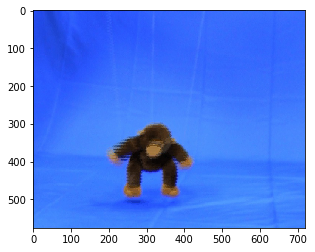

In [3]:
test_img=imread('frames_sub/original12.jpg')
plt.imshow(test_img)

In [4]:
print(test_img.shape[0])
print(frame_height)
print(test_img.shape[1])

576
576.0
720


In [5]:
#test_a=imread('frames_sub/original1.jpg')
#test_b=imread('frames_sub/original2.jpg')
def calculate_min_ssd(A,B):
    sum = np.sum((A[:,:,0:3]-B[:,:,0:3])**2)
    square_sum=math.sqrt(sum)
    return square_sum
def producing_blocks(height_index,width_index,image):
    if(height_index<0 or width_index<0 or width_index>78 or height_index>60):
            mat=np.zeros((9,9,3))
            return mat
    mat=np.zeros((9,9,3))
    for x in range(0,9):
        for y in range(0,9):
            #print(x,y)
           
            
            mat[x][y]=image[height_index*9+x][width_index*9+y]
            
            
            
    return mat

In [6]:
def arrow_draw(img, x1, y1, x2, y2): 
    radians = math.atan2(x1-x2, y2-y1) 
    x11 = 0
    y11 = 0
    x12 = -10 
    y12 = -10
    u11 = 0 
    v11 = 0 
    u12 = 10 
    v12 = -10
    x11_=x11*math.cos(radians)-y11*math.sin(radians)+x2
    y11_=x11*math.sin(radians)+y11*math.cos(radians)+y2

    x12_=x12*math.cos(radians)-y12*math.sin(radians)+x2
    y12_=x12*math.sin(radians)+y12*math.cos(radians)+y2

    u11_=u11*math.cos(radians)-v11*math.sin(radians)+x2
    v11_=u11*math.sin(radians)+v11*math.cos(radians)+y2
    u12_=u12*math.cos(radians)-v12*math.sin(radians)+x2
    v12_=u12*math.sin(radians)+v12*math.cos(radians)+y2
    img = cv2.line(img, (x1, y1), (x2, y2), (0, 255, 255), 3)
#     img = cv2.line(img, (int(x11_), int(y11_)), (int(x12_), int(y12_)), (0, 255, 255), 2)
#     img = cv2.line(img, (int(u11_), int(v11_)), (int(u12_), int(v12_)), (0, 255, 255), 2)
    return img

In [7]:
frame_counter=0
temp_count=0
block_counter=0
temp_height_index=0
temp_width_index=0
while(frame_counter<100):
        print(frame_counter)
        img_cur=cv2.imread(frame_save_path + 'original%d.jpg' % temp_count)
        for outer_height in range(0,64):
            print('outer_height')
            print(outer_height)
            for outer_width in range(0,80):
                print('outer_width')
                print(outer_width)
                
        #img_next=imread(frame_save_path + 'original%d.jpg' % temp_count+1)
                block_reference=np.zeros((9,9,3))
                block_reference=producing_blocks(outer_height,outer_width,img_cur)
                ssd_min=20000
                for height in range(outer_height-1,outer_height+1):
                    for width in range(outer_width-1,outer_width+1):
                        img_next=cv2.imread(frame_save_path + 'original%d.jpg' % (temp_count+1))
                        block_cur=producing_blocks(height,width,img_next)
                        ssd=calculate_min_ssd(block_reference,block_cur)
                        if(ssd < ssd_min):
                            ssd_min=ssd
                            min_height_index=height
                            min_width_index=width          
                if(ssd_min>280 and ssd_min<500):
                    print('the first block should be modified now')             
                    new_img=arrow_draw(img_cur,outer_width*9,outer_height*9,min_width_index*9,min_height_index*9)
                    #plt.plot(img_cur,min_height_index*9, min_width_index*9, 'w.')
                    img_cur=new_img
        frame_save = './frames_output/'
        create_dir_if_not_exists(frame_save)
        cv2.imwrite(frame_save + 'output%d.jpg' % frame_counter, img_cur)      
        temp_count=temp_count+1        
            #height-outer_height,width-outer_width
        frame_counter=frame_counter+1

82
outer_height
0
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
ou

outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
7
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer

outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
14
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
oute

outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
21
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
oute

outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
28
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
oute

outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
34
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
the first block should be modified now
outer_width
37
the first block should be modified now
outer_width
38
the first block should be modified now
outer_width
39
the first block should be modified now
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
4

outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
the first block should be modified now
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
the first block should be modified now
outer_width
38
the first block should be modified now
outer_width
39
the first block should be modified now
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_w

outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
47
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
oute

outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
53
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
oute

outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
60
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
oute

outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
3
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4


outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72

outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
16
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
oute

outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
23
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
oute

outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
30
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
oute

outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
the first block should be modified now
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
37
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_

outer_width
38
outer_width
39
outer_width
40
outer_width
41
the first block should be modified now
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
43
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_widt

outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
49
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
oute

outer_width
77
outer_width
78
outer_width
79
outer_height
55
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
the first block should be modified now
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
the first block should be modified now
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
o

outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
62
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
oute

outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
5
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer

outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
12
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4

outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
7

outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
25
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
oute

outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
32
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
oute

outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
39
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
oute

outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
45
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
the first block should be modified now
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
the first block should be modified now
o

outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
51
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
the first block should be modified now
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_widt

outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
57
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
the first block should be modified

outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
85
outer_height
0
outer_width
0
outer_width
1
outer_width
2
outer_widt

outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72

outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
13
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
oute

outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
20
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
oute

outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
27
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
oute

outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
34
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
oute

outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_widt

outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
47
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
the first block should be modified now
outer_width
21
outer_width
22
outer_widt

outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
53
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
the first block should be modified now
outer_width
24
outer_width
25
outer_width
26
outer_width
27
the first block should be modified now
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
the first block should be modified now
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_w

outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
59
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
oute

outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
2
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer

outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
9
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer

outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
16
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
oute

outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
23
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
oute

outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
30
outer_width
0
outer_widt

outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72

outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
43
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
the first block should be modified now
outer_width
27
the first block should be modified now
outer_width
28
outer_width
29
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_w

outer_width
79
outer_height
49
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
the first block should be modified now
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
outer_width
33
outer_width
34
the first block should be modified now
outer_width
35
outer_width
36
the first block should be modified now
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
5

outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
55
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
the first block should be modified now
outer_width
26
the first block should be modified now
outer_width
27
the first block should be modified now
outer_width
28
the first block should be modified now
outer_width
29
the first block should be modified now
outer_width
30
the first block should be modified now
outer_width
31
the first block should be modified now
outer_width
32
the first block should be modified now
outer_width
33
outer_width
34
outer_width
35
the first block should be modified now
outer_width
36
outer_width
37
outer_width
3

outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_widt

outer_height
4
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer

outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
11
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
oute

outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
18
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
oute

outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
25
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
oute

outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
32
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
oute

outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
39
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
oute

outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
45
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
the first block should be modified now
outer_width
26
the first block should be modified now
outer_width
27
outer_width
28
the first block should be modified now
outer_width
29
the first block should be modified now
outer_width
30
the first block should be modified now
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
the first block should be modified now
outer_width
36
the first 

outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
51
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
the first block should be modified now
outer_width
21
outer_width
22
the first block should be modified now
outer_width
23
outer_width
24
the first block should be modified now
outer_width
25
the first block should be modified now
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
the first block should be modified now
outer_width
35
outer_width
36
outer_width
37
the first block should be modified now
outer_width
38
outer_widt

outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
57
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
oute

outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
88
outer_height
0
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
ou

outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_widt

outer_width
79
outer_height
13
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
oute

outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
20
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
oute

60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
27
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
o

outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
34
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
oute

outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
41
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
oute

outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
47
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
the first block should be modified now
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
the first block should be modified now
outer_width
33
the first block should be modified now
outer_width
34
the first block should be modified now
outer_width
35
outer_width
36
the 

outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
53
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
the first block should be modified now
outer_width
22
the first block should be modified now
outer_width
23
the first block should be modified now
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
the first block should be modified now
outer_width
37
the first block should be modified now
oute

outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width


outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
2
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer

outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
9
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer

outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
16
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
oute

outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
23
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
oute

outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
30
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
oute

outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
37
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
oute

outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
43
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
the first block should be modified now
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
the first block should be modified now
outer_width
33
outer_width
34
the first block should be modified now
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
4

outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
49
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
oute

outer_width
78
outer_width
79
outer_height
55
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
the first block should be modified now
outer_width
37
the first block should be modified now
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
o

outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
62
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
oute

outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
5
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer

outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
12
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
oute

outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
19
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
ou

outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72

outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
32
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
oute

outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
39
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
the first block should be modified now
outer_width
29
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
the first block should be modified now
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_w

outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
the first block should be modified now
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
outer_width
33
the first block should be modified now
outer_width
34
the first block should be modified now
outer_width
35
the first block should be modified now
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_widt

outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
52
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
oute

outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
58
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
oute

outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
1
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer

outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
8
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer

outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
15
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
oute

outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
22
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
oute

outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
29
outer_width
0
outer_width
1
outer_width
2
outer_width


outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
7

outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
42
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
the first block should be modified now
outer_width
27
outer_width
28
outer_width
29
the first block should be modified now
outer_width
30
outer_width
31
outer_width
32
the first block should be modified now
outer_width
33
outer_width
34
outer_width
35
outer_w

outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
48
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
the first block should be modified now
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
the first block should be modified now
outer_width
30
the first block should be modified now
outer_width
31
the first block should be modified now
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
3

outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
54
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
the first block should be modified now
outer_width
21
the first block should be modified now
outer_width
22
the first block should be modified now
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
the first block should be modified now
outer_width
34
the first block should be modified now
outer_width
35
outer_width
36
outer_width
37
the first block should be modified now
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_widt

outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
61
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
oute

outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
4
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer

outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
11
outer_width
0
outer_widt

outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71


outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
24
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
oute

outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
31
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
oute

outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
38
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
oute

outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
44
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
the first block should be modified now
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
the first block should be modified now
outer_width
33
the first block should be modified now
outer_width
34
the first block should be modified now
outer_width
35
the first block should be modified now
outer_width
36
outer_width
37
the first block should be modified now
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
o

outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
50
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
the first block should be modified now
outer_width
19
outer_width
20
the first block should be modified now
outer_width
21
the first block should be modified now
outer_width
22
the first block should be modified now
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
the first block should be modified now
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
oute

outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
56
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
the first block should be modified now
outer_width
25
the first block should be modified now
outer_width
26
outer_width
27
the first block should be modified now
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_w

outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
63
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
oute

outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
6
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer

outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
13
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
oute

outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
20
outer_wid

outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
o

outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
33
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
oute

outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
40
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
the first block should be modified now
outer_width
35
the first 

outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
46
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
the first block should be modified now
outer_widt

outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
52
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
the first block should be modified now
outer_width
21
outer_width
22
the first block should be modified now
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
the first block should be modified now
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
the first block should be modified now
outer_width
37
outer_width
38
outer_width
39
outer_width
4

outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
59
outer_width
0
outer_widt

outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
out

outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
8
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer

outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
15
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
oute

outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
22
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
oute

outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
29
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
oute

outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
36
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
oute

outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
the first block should be modified now
outer_width
37
the first block should be modified now
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
oute

outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
the first block should be modified now
outer_width
21
outer_width
22
outer_width
23
the first block should be modified now
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
the first block should be modified now
outer_width
32
the first block should be modified now
outer_width
33
the first block should be modified now
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
ou

outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
the first block should be modified now
outer_width
24
outer_width
25
outer_width
26
outer_width
27
the first block should be modified now
outer_width
28
the first block should be modified now
outer_width
29
the first block should be modified now
outer_width
30
the first block should be modified now
outer_width
31
outer_width
32
the first block should be modified now
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_

outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
61
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
oute

outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
4
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer

outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
11
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
ou

outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_widt

outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
24
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
oute

outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
31
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
oute

outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
38
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
oute

outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
the first block should be modified now
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
o

outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
the first block should be modified now
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
the first block should be modified now
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
51
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
o

outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
the first block should be modified now
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
the first block should be modified now
outer_width
36
the first block should be modified now
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
7

outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
oute

outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
6
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer

outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
13
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
oute

outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
20
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
outer_width
23
outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
oute

outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41
outer_width
42
outer_width
43
outer_width
44
outer_width
45
outer_width
46
outer_width
47
outer_width
48
outer_width
49
outer_width
50
outer_width
51
outer_width
52
outer_width
53
outer_width
54
outer_width
55
outer_width
56
outer_width
57
outer_width
58
outer_width
59
outer_width
60
outer_width
61
outer_width
62
outer_width
63
outer_width
64
outer_width
65
outer_width
66
outer_width
67
outer_width
68
outer_width
69
outer_width
70
outer_width
71
outer_width
72
outer_width
73
outer_width
74
outer_width
75
outer_width
76
outer_width
77
outer_width
78
outer_width
79
outer_height
27
outer_width
0
outer_width
1
outer_width
2
outer_width
3
outer_width
4
outer_width
5
outer_width
6
outer_width
7
outer_width
8
outer_width
9
outer_width
10
outer_width
11
outer_width
12
outer_width
13
outer_width
14
outer_width
15
outer_width
16
outer_width
17
outer_width
18
outer_width
19
outer_width
20
outer_width
21
outer_width
22
oute

outer_width
24
outer_width
25
outer_width
26
outer_width
27
outer_width
28
outer_width
29
outer_width
30
outer_width
31
outer_width
32
outer_width
33
outer_width
34
outer_width
35
outer_width
36
outer_width
37
outer_width
38
outer_width
39
outer_width
40
outer_width
41


KeyboardInterrupt: 

In [7]:
frame_save = './frames_output/'
path_to_output_video = './cute_monkey.mov'
out = cv2.VideoWriter(path_to_output_video, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (int(frame_width), int(frame_height)))
frame_counter = 0
while(1):
    img = cv2.imread(frame_save + 'frame%d.jpg' % frame_counter)
    if img is None:
        print('No more frames to be loaded')
        break;
    out.write(img)
    frame_counter += 1
out.release()
cv2.destroyAllWindows()

No more frames to be loaded
